In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import statsmodels.api as sm

data = pd.read_csv("D:\Ftn\python\Instagram data.csv",encoding='latin1')
print(data.head())

<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:11: SyntaxWarning: invalid escape sequence '\F'
C:\Users\hp_5C\AppData\Local\Temp\ipykernel_4012\3253507665.py:11: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv("D:\Ftn\python\Instagram data.csv",encoding='latin1')


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [2]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [3]:
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\hp_5C\AppData\Local\Temp\ipykernel_4012\1217834572.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


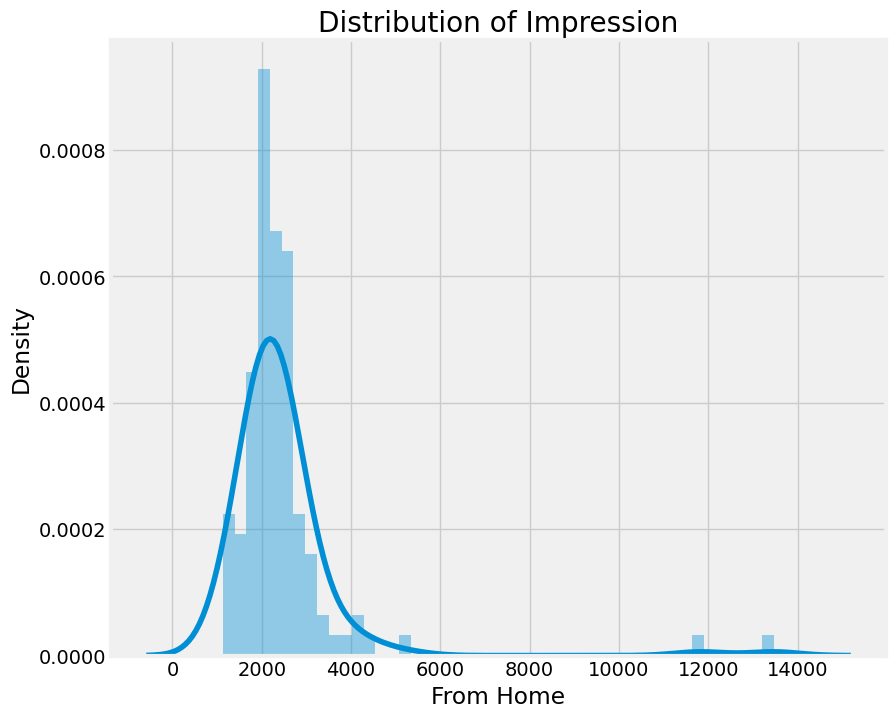

In [5]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression")
sns.distplot(data['From Home'])
plt.show()

C:\Users\hp_5C\AppData\Local\Temp\ipykernel_4012\1804646398.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


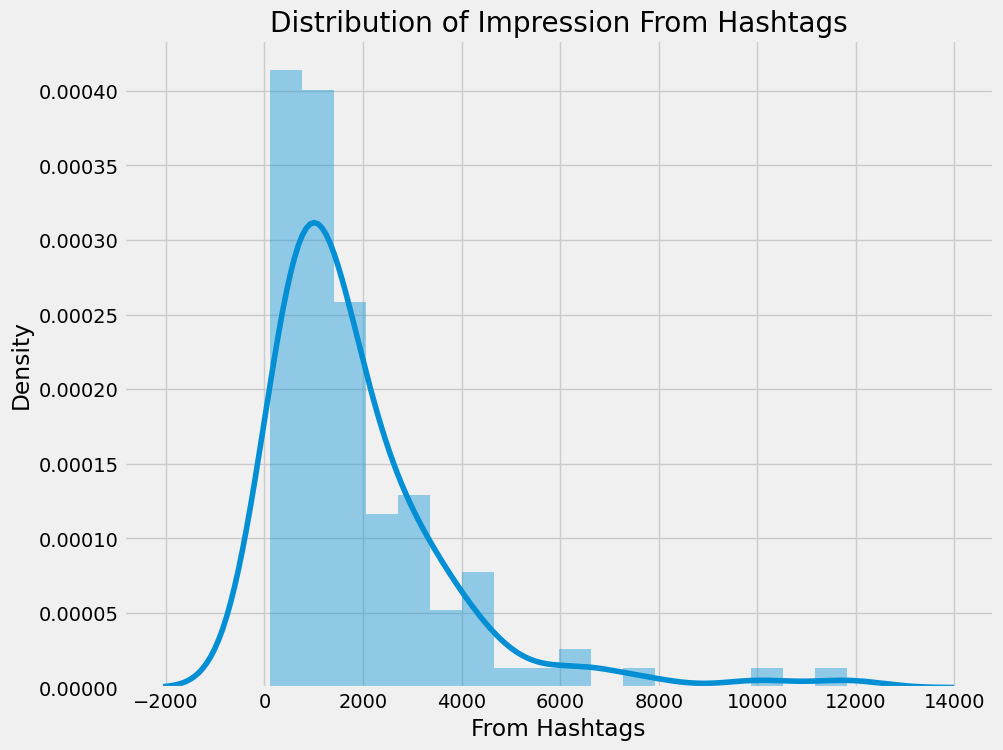

In [6]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\hp_5C\AppData\Local\Temp\ipykernel_4012\1151225908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


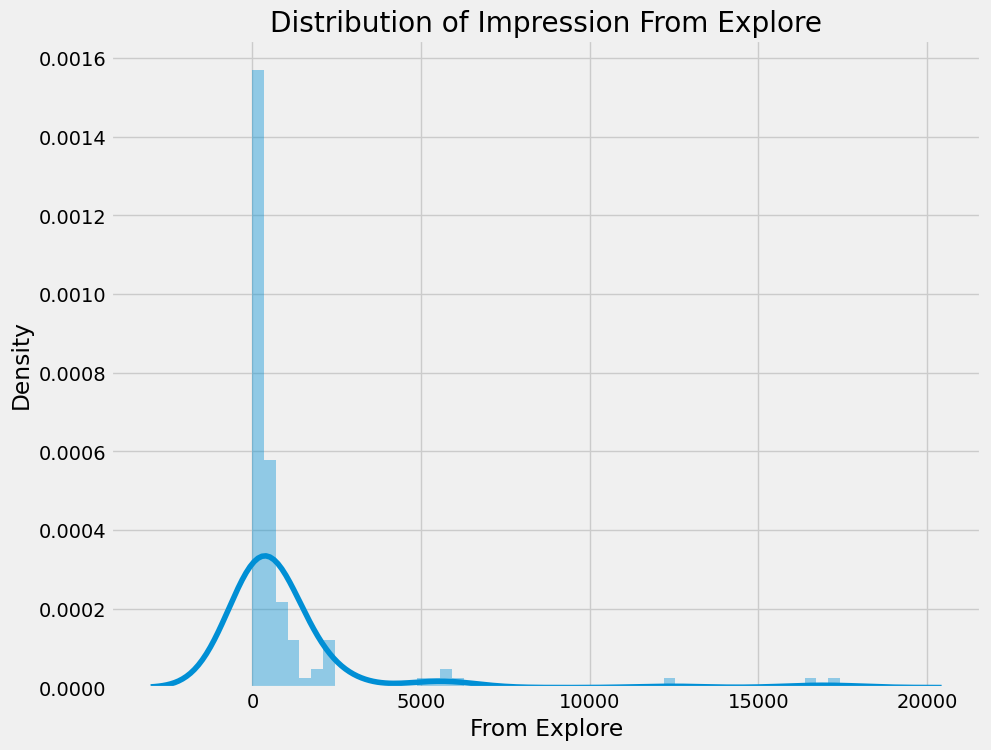

In [7]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [8]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From explore','From Other']
values = [home,hashtags,explore,other]

fig = px.pie(data,values=values,names=labels,title='Impressions on Instagram Post From Various Sources',hole=0.5)
fig.show()

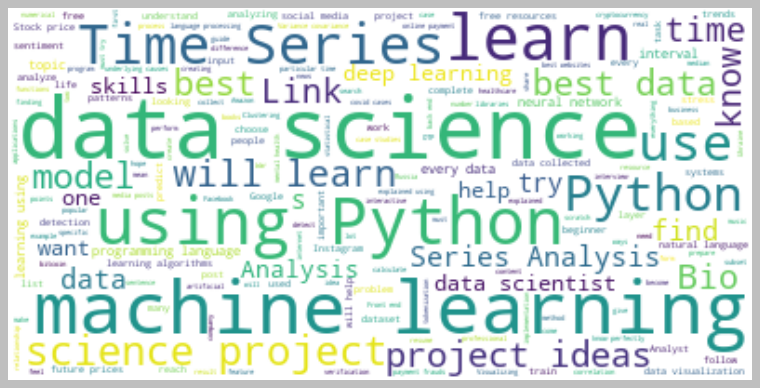

In [9]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
figure = px.scatter(data_frame=data, x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationsghip Between Likes and Impressions")
figure.show()

In [11]:
figure = px.scatter(data_frame=data, x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationsghip Between Comments and Impressions")
figure.show()

In [12]:
figure = px.scatter(data_frame=data, x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationsghip Between Shares and Impressions")
figure.show()

In [13]:
figure = px.scatter(data_frame=data, x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationsghip Between Saves and Impressions")
figure.show()

In [14]:
insta_numeric = data.select_dtypes(include=[np.number])
correlation = insta_numeric.corr()
correlation['Impressions'].sort_values(ascending=False)



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [15]:
conversion_rate = (data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


In [16]:
x = np.array(data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y = np.array(data["Impressions"])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model = PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8958858754675272

In [18]:
# featurs = ['Likes','Saves','Comments','Shares','Profile Visits','Follows']
featurs = np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(featurs)

array([11735.06651203])